### Import Libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Image to Array

In [2]:
def load_image(image_path):
    img = Image.open(image_path)
    img_data = np.array(img)  # Convert to numpy array
    return img_data

image_path = "encrypted_image.png"  # Path to the input image
img_data = load_image(image_path)

### Chaotic Sequence

In [3]:
def logistic_map(size, r, x0):
    chaotic_sequence = []
    x = x0
    for i in range(size):
        x = r * x * (1 - x)
        chaotic_sequence.append(x)
    return chaotic_sequence

r = 3.99  # Control parameter for chaos
x0 = 0.5  # Initial condition
num_pixels = img_data.shape[0] * img_data.shape[1]
chaotic_seq = logistic_map(num_pixels, r, x0)

### Decryption

In [5]:
def descramble_image(scrambled_img, chaotic_seq):
    flat_scrambled = scrambled_img.flatten()
    descrambled_img = np.zeros_like(flat_scrambled)
    
    # Normalize the chaotic sequence to match pixel indices
    indices = np.argsort(chaotic_seq)

    # Reverse the scrambling based on the chaotic sequence
    for i in range(len(flat_scrambled)):
        descrambled_img[indices[i]] = flat_scrambled[i]
    
    # Reshape back to original image shape
    descrambled_img = descrambled_img.reshape(scrambled_img.shape)
    return descrambled_img

descrambled_img_data = descramble_image(img_data, chaotic_seq)

### Print

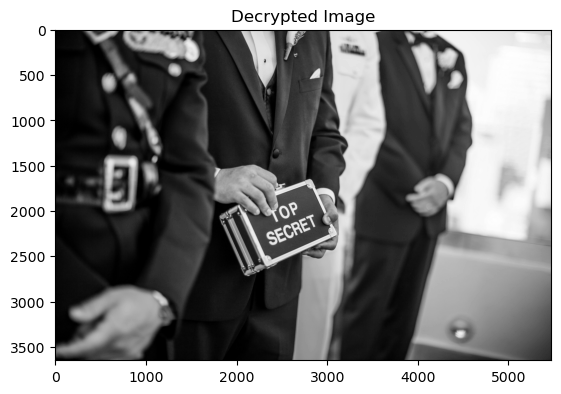

In [6]:
plt.imshow(descrambled_img_data, cmap='gray')
plt.title("Decrypted Image")
plt.show()

### Save

In [14]:
def save_image(image_data, save_path):
    encrypted_image = Image.fromarray(image_data.astype(np.uint8))  # Convert numpy array back to image
    encrypted_image.save(save_path)  # Save image
    print(f"Decrypted image saved as: {save_path}")

save_path = "decrypted_image.png"
save_image(descrambled_img_data, save_path)

Decrypted image saved as: decrypted_image.png
